Before you turn in your homework, make sure everything runs as expected.

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `# YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```

The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT:**

* **DO NOT DELETE ANY CELL** and do not change the title of the Notebook.

* Use the same variable names as the ones written in the questions; otherwise, the tests will fail.

* Before you turn in your homework, make sure everything runs as expected: restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Fill your name below:

In [1]:
name = "Jiaxuan Yu"

# Two-dimensional lid-driven cavity flow

For the take-home part of the final exam, you will solve the two-dimensional Navier-Stokes equations for an incompressible flow in a square cavity.

The non-dimensional Navier-Stokes equation in vector form:

$$
\begin{equation}
    \frac{\partial \mathbf{u}}{\partial t} + \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} = - \nabla p + \frac{1}{Re} \nabla^2 \mathbf{u}
\end{equation}
$$

where $\mathbf{u}$ is the velocity vector field, $p$ is the pressure scalar field, and $Re$ is the Reynolds number.

The equation above represents three scalar equations, one for each velocity component.
But you will solve it in two dimensions, so there will be two scalar equations.

The continuity equation for an incompressible flow is:

$$
\begin{equation}
    \nabla \cdot \mathbf{u} = 0
\end{equation}
$$

It says that the velocity field is divergence-free.

You will use an explicit scheme to discretize the equations in time:

$$
\begin{equation}
    \frac{\mathbf{u}^{n+1} - \mathbf{u}^n}{\Delta t} = -\nabla p - \left[ \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} \right]^n + \frac{1}{Re} \left[ \nabla^2 \mathbf{u} \right]^n
\end{equation}
$$

### Fractional-step method

To solve the equations, you will use a fractional-step method.
The essence of the method is to first solve an equation for an intermediate velocity field that does not satisfy the continuity equation.
In a second step, the intermediate velocity is projected onto the space of divergence-free fields.

First, we solve an equation for an intermediate velocity field $\mathbf{u}^\star$ is:

$$
\begin{equation}
    \frac{\mathbf{u}^\star - \mathbf{u}^n}{\Delta t} = - \left[ \left( \mathbf{u} \cdot \nabla \right) \mathbf{u} \right]^n + \frac{1}{Re} \left[ \nabla^2 \mathbf{u} \right]^n
\end{equation}
$$

(It corresponds to the discrete Navier-Stokes equation without the pressure-gradient term.)

The projection-step equation is:

$$
\begin{equation}
    \frac{\mathbf{u}^{n+1} - \mathbf{u}^\star}{\Delta t} = -\nabla p
\end{equation}
$$

which, after re-arranging the terms, is equivalent to:

$$
\begin{equation}
    \mathbf{u}^{n+1} = \mathbf{u}^\star - \Delta t \; \nabla p
\end{equation}
$$

Calculating $\mathbf{u}^{n+1}$ requires us to first get the pressure field $p$.
We can derive an equation for the pressure by taking the divergence on both sides of the projection equation:

$$
\begin{equation}
    \nabla \cdot \mathbf{u}^{n+1} = \nabla \cdot \mathbf{u}^\star - \Delta t \; \nabla^2 p
\end{equation}
$$

Because we require the final velocity to have no divergence, we get:

$$
\begin{equation}
    \nabla^2 p = \frac{1}{\Delta t} \mathbf{u}^\star
\end{equation}
$$

This is our pressure Poisson equation.

You will discretize the spatial operators using central-difference formula.
As a reminder:

$$
\begin{equation}
    \frac{\partial f}{\partial x}\Big|_{i, j} = \frac{f_{i+1, j} - f_{i-1, j}}{2 \Delta x} + \mathcal{O} \left( \Delta x^2 \right)
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial f}{\partial y}\Big|_{i, j} = \frac{f_{i, j+1} - f_{i, j-1}}{2 \Delta y} + \mathcal{O} \left( \Delta y^2 \right)
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial^2 f}{\partial x^2}\Big|_{i,j} = \frac{f_{i-1, j} - 2 f_{i, j} + f_{i+1, j}}{\Delta x^2} + \mathcal{O} \left( \Delta x^2 \right)
\end{equation}
$$

$$
\begin{equation}
    \frac{\partial^2 f}{\partial y^2}\Big|_{i,j} = \frac{f_{i, j-1} - 2 f_{i, j} + f_{i, j+1}}{\Delta y^2} + \mathcal{O} \left( \Delta y^2 \right)
\end{equation}
$$

In summary, each time step you should:

1. Solve the two-dimensional discrete Navier-Stokes equation without the pressure-gradient term for the intermediate velocity field $\mathbf{u}^\star$.

$$
\begin{eqnarray}
    \frac{u_{ij}^\star - u_{ij}^n}{\Delta t} = - u_{ij}^n \frac{u_{i+1, j}^n - u_{i-1, j}^n}{2 \Delta x} - v_{ij}^n \frac{u_{i, j+1}^n - u_{i, j-1}^n}{2 \Delta y} + \frac{1}{Re} \left( \frac{u_{i-1, j}^n - 2 u_{ij}^n + u_{i+1, j}^n}{\Delta x^2} + \frac{u_{i, j-1}^n - 2 u_{ij}^n + u_{i, j+1}^n}{\Delta y^2} \right) \\
    \frac{v_{ij}^\star - v_{ij}^n}{\Delta t} = - u_{ij}^n \frac{v_{i+1, j}^n - v_{i-1, j}^n}{2 \Delta x} - v_{ij}^n \frac{v_{i, j+1}^n - v_{i, j-1}^n}{2 \Delta y} + \frac{1}{Re} \left( \frac{v_{i-1, j}^n - 2 v_{ij}^n + v_{i+1, j}^n}{\Delta x^2} + \frac{v_{i, j-1}^n - 2 v_{ij}^n + v_{i, j+1}^n}{\Delta y^2} \right) \\
\end{eqnarray}
$$

2. Solve the Poisson equation for the pressure field $p$.

$$
\begin{equation}
    \frac{p_{i-1, j} - 2 p_{ij} + p_{i+1, j}}{\Delta x^2} + \frac{p_{i, j-1} - 2 p_{ij} + p_{i, j+1}}{\Delta y^2} = \frac{1}{\Delta t} \left( \frac{u_{i+1, j}^\star - u_{i-1, j}^\star}{2 \Delta x} + \frac{v_{i, j+1}^\star - v_{i, j-1}^\star}{2 \Delta y} \right)
\end{equation}
$$

3. Update the intermediate velocity with the pressure gradient to get a divergence-free velocity field.

$$
\begin{eqnarray}
    u_{ij}^{n+1} = u_{ij}^\star - \frac{p_{i+1, j} - p_{i-1, j}}{2 \Delta x} \\
    v_{ij}^{n+1} = v_{ij}^\star - \frac{p_{i, j+1} - p_{i, j-1}}{2 \Delta y}
\end{eqnarray}
$$

### Your assignment

You will solve discrete equations in a square domain $\left[ 0, 1 \right] \times \left[ 0, 1 \right]$ using a uniform grid with the same grid spacing in $x$ and $y$ directions ($n_x = n_y = 41$, $\Delta x = \Delta y$).

The Reynolds number is set to $Re = 10$.

Initial conditions:

$$
\begin{eqnarray}
    u \left( t = 0 \right) &=&
    \begin{cases}
        1 \quad \text{at} \; y = 1 \\
        0 \quad \text{everywhere else}
    \end{cases} \\
    v \left( t = 0 \right) &=& 0 \\
    p \left( t = 0 \right) &=& 0
\end{eqnarray}
$$

Boundary conditions:

* Left: $u = 0$, $v = 0$, and $\frac{\partial p}{\partial x} = 0$
* Right: $u = 0$, $v = 0$, and $\frac{\partial p}{\partial x} = 0$
* Bottom: $u = 0$, $v = 0$, and $\frac{\partial p}{\partial y} = 0$
* Top (at the lid): $u = 1$, $v = 0$, and $p = 0$

Compute $n_t = 9000$ time steps with a time-step size $\Delta t = 10^{-4}$.

To solve the discrete pressure Poisson equation, you will implement and use the method of conjugate gradients that we implemented in [Lesson 4](https://nbviewer.ipython.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/05_relax/05_04_Conjugate.Gradient.ipynb) of Module 5.
If you wish, you can even use Numba to accelerate the time to convergence of the Poisson equation.

You should stop the conjugate-gradient solver once the relative $L_2$-norm of the difference between two successive iterations is smaller than $10^-6$, i.e. when:

$$
\begin{equation}
    \frac{\| p^{k+1} - p^k \|_{L_2}}{\| p^k \|_{L_2}} < 10^{-6}
\end{equation}
$$

---
## Implement your solution (50 points)

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
# YOUR CODE HERE


In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [4]:
nx = 41
ny = 41
Lx = 1.0
Ly = 1.0
dx = Lx/(nx-1)
dy = Ly/(ny-1)
Re = 10
nt = 9000
dt = 1e-4

x  = numpy.linspace(0.0, Lx, num = nx)
y  = numpy.linspace(0.0, Ly, num = ny)

u0           = numpy.zeros((ny, nx))
u0[:,(ny-1)] = 1.0
v0           = numpy.zeros((ny, nx))
p0           = numpy.zeros((ny, nx))

u            = u0.copy()
v            = v0.copy()

u_star       = u0.copy()
v_star       = v0.copy()
un           = u0.copy()
vn           = v0.copy()

maxiter = 20000
rto1    = 1e-6

In [5]:
p0 = numpy.zeros((ny, nx))
p  = p0.copy()
b  = numpy.zeros_like(p0)

In [6]:
def l2_norm(p, p_ref):
    l2_diff = numpy.sqrt(numpy.sum((p - p_ref)**2))
    l2_ref  = numpy.sqrt(numpy.sum(p_ref**2))
    if l2_ref > 1e-12:
        return l2_diff / l2_ref
    return l2_diff

In [7]:
def poisson_2d_conjugate_gradient(p0, b, dx, dy, maxiter, rtol):
    def A(p):
        return (-4.0 * p[1:-1, 1:-1] + p[1:-1, :-2] + p[1:-1, 2:] +
                p[:-2, 1:-1] + p[2:, 1:-1]) / dx**2
    p    = p0.copy()
    r    = numpy.zeros_like(p)
    Ad   = numpy.zeros_like(p)
    conv = []
    diff = rtol + 1
    ite  = 0
    
    r[1:-1, 1:-1] = b[1:-1, 1:-1] - A(p)
    
    d = r.copy()
    while diff > rtol and ite < maxiter:
        pk = p.copy()
        rk = r.copy()
        Ad[1:-1, 1:-1] = A(d)
        alpha = numpy.sum(r * r) / numpy.sum(d * Ad)
        p = pk + alpha * d
        r = rk - alpha * Ad
        beta = numpy.sum(r * r) / numpy.sum(rk * rk)
        d = r + beta * d
        diff = l2_norm(p, pk)
        conv.append(diff)
        ite += 1
        p[:,0]  = p[:,1]
        p[:,-1] = p[:,-2]
        p[0,:]  = p[1,:]
        p[-1,:] = 0
               
    return p

In [8]:
for n in range (nt):
    un     = u.copy()
    vn     = v.copy()
    u_star = u.copy()
    v_star = v.copy()
    
    u_star[1:-1,1:-1] = (un[1:-1,1:-1] + dt *(-un[1:-1,1:-1] * ((un[1:-1, 2:]-un[1:-1, :-2])/(2*dx))  
                                              -vn[1:-1,1:-1] * ((un[2:,1:-1]-un[:-2, 1:-1])/(2*dy))
                                             +(1/Re) * ((un[1:-1, :-2]- 2*un[1:-1, 1:-1] +un[1:-1, 2:])/dx**2
                                                       +(un[:-2, 1:-1]- 2 * un[1:-1, 1:-1] + un[2:, 1:-1])/dy**2)))
    v_star[1:-1,1:-1] = (vn[1:-1,1:-1] + dt *(-un[1:-1,1:-1] * ((vn[1:-1, 2:]-vn[1:-1, :-2])/(2*dx))  
                                              -vn[1:-1,1:-1] * ((vn[2:, 1:-1]-vn[:-2, 1:-1])/(2*dy))
                                             +(1/Re) * ((vn[1:-1, :-2]- 2*vn[1:-1, 1:-1] +vn[1:-1, 2:])/dx**2
                                                       +(vn[:-2, 1:-1]- 2 * vn[1:-1, 1:-1] + vn[2:, 1:-1])/dy**2)))
    
    u_star[:, 0] = 0.0
    v_star[:, 0] = 0.0
    u_star[:,-1] = 0.0
    v_star[:,-1] = 0.0
    u_star[0, :] = 0.0
    v_star[0, :] = 0.0
    u_star[-1,:] = 1.0
    v_star[-1,:] = 0.0

    b[1:-1,1:-1]  = ((1/dt) * ((u_star[1:-1, 2:]-u_star[1:-1, :-2])/(2*dx)+ (v_star[2:, 1:-1]-v_star[:-2, 1:-1])/(2*dy)))

    p = poisson_2d_conjugate_gradient(p, b, dx, dy, maxiter, rto1)
    
    u[1:-1, 1:-1] = u_star[1:-1, 1:-1] - dt*((p[1:-1, 2:]-p[1:-1, :-2])/(2*dx))
    v[1:-1, 1:-1] = v_star[1:-1, 1:-1] - dt*((p[2:, 1:-1]-p[:-2, 1:-1])/(2*dy))
    
    u[:, 0] = 0.0
    v[:, 0] = 0.0
    u[:,-1] = 0.0
    v[:,-1] = 0.0
    u[0, :] = 0.0
    v[0, :] = 0.0
    u[-1,:] = 1.0
    v[-1,:] = 0.0

---
## Assessment

**Important**:
Do not try to delete or modify the cells that are already present. For each question, make sure to provide your answer in the cell just **above** the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)

### Part 1 (10 points)

Plot the filled contour of the pressure scalar field and the streamlines of the velocity vector field after $9000$ time steps.

Here is a figure of what you should obtain:

![figure1](figures/cavity.png)

**Figure 1:** Filled contour of the pressure field and streamlines of the velocity field in a two-dimensional lid-driven cavity at Reynolds number $Re = 10$.

**Hint:** For the filled contour, I used the function [`pyplot.contourf()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) with $51$ levels between $-1$ and $1$. For the velocity streamlines, I used the function [`pyplot.streamplot`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot).

In [9]:
# YOUR CODE HERE


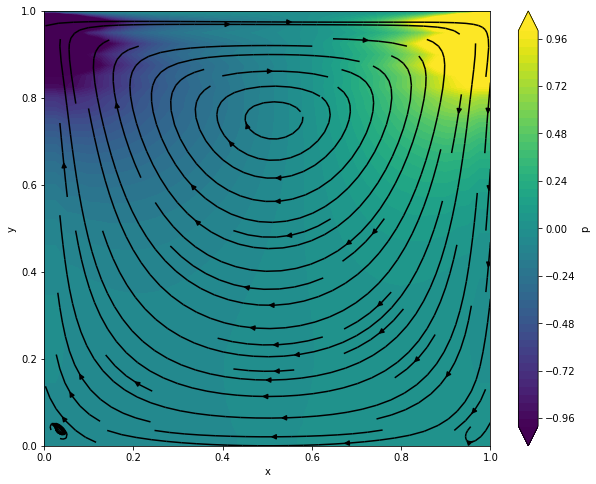

In [10]:
pyplot.figure(figsize=(10.0,8.0))
levels = numpy.linspace(-1.0, 1.0,num =51)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(0.0 , 1.0)
pyplot.ylim(0.0, 1.0)
pyplot.contourf(x,y,p, levels = levels, extend = 'both')
contf = pyplot.contourf(x, y, p, levels=levels, extend = 'both')
cbar  = pyplot.colorbar(contf)
cbar.set_label('p')
pyplot.streamplot(y,x,u,v, color= 'black')

### Part 2 (20 points)

Compute the divergence of the velocity field after $9000$ time steps and plot the filled contour of the absolute value.

In two dimensional the divergence of the velocity vector field is:

$$
\begin{equation}
    \nabla \cdot \mathbf{u} = \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y}
\end{equation}
$$

To compute the divergence, you will use the following discrete version:

$$
\begin{equation}
    \left( \nabla \cdot \mathbf{u} \right)_{i, j} = \frac{u_{i+1, j} - u_{i-1, j}}{2 \Delta x} + \frac{v_{i, j+1} - v_{i, j-1}}{2 \Delta y}
\end{equation}
$$

(Note that using the discrete equation above, the divergence will be computed only at interior points, not on the boundaries.)

Here is a figure of what you should obtain:

![figure2](./figures/divergence.png)

**Figure 2:** Filled contour of the absolute divergence of the velocity field in a two-dimensional lid-driven cavity at Reynolds number $Re = 10$. ($51$ levels between $0$ and $1$.)

In [11]:
# YOUR CODE HERE


In [12]:
D = ((u[1:-1, 2:]- u[1:-1, :-2])/(2*dx) + (v[2:, 1:-1]- v[:-2, 1:-1])/(2*dy))

In [13]:
#len(D)

In [14]:
#len(x)

In [15]:
ABSD = numpy.zeros_like(u0)
ABSD[1:-1, 1:-1] = abs(D)

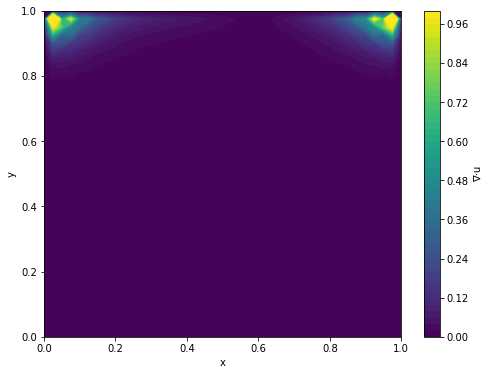

In [16]:
pyplot.figure(figsize=(8.0,6.0))
levels = numpy.linspace(0.0, 1.0,num =51)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contourf(x,y,ABSD, levels = levels, extend = 'both')
contf  = pyplot.contourf(x, y, ABSD, levels=levels)
cbar   = pyplot.colorbar(contf)
cbar.set_label('∇⋅u')

### Part 3 (10 points)

What's the $L_2$-norm of the $\nabla \cdot \mathbf{u}$ (after $9000$ time steps) divided by the number of interior points?

$$
\begin{equation}
    \frac{\| \nabla \cdot \mathbf{u} \|_{L_2}}{\left( n_x - 2 \right) \left( n_y - 2 \right)}
\end{equation}
$$

**Hint:** If everything goes smooth, you should obtain a _small_ value (I got a value of about $3 \times 10^{-3}$).

**Important:** Store your result in the variable l2_div.

In [17]:
# YOUR CODE HERE


In [18]:
DL     = numpy.sqrt(numpy.sum(D**2))
l2_div = DL/((nx-2)* (ny-2))

In [19]:
print(l2_div)

0.002945601500793654


### Part 4 (10 points)

Compute and plot the velocity components at the middle of the cavity.

More specifically, compute and plot:

* the $x$-component of the velocity along a vertical line at $x = 0.5$ and
* the $y$-component of the velocity along an horizontal line at $y = 0.5$.

Compare your results to the numerical solution obtained with another Computational Fluid Dynamics software called [PetIBM](https://github.com/barbagroup/PetIBM).

The data set obtained with PetIBM is located in `data/petibm-cavityRe10.dat`.
The file contains four columns.
The first two columns contains the $y$-coordinates along a vertical gridline at $x = 0.5$ and the $x$-component of the velocity at those points.
The last two columns contains the $x$-coordinates along an horinzontal gridline at $y = 0.5$ and the $y$-component of the velocity at those points.

To load the data from the file, you can use the following Python code:

```pyhton
filepath = 'data/petibm-cavityRe10.dat'
with open(filepath, 'r') as infile:
    ym, um, xm, vm = numpy.loadtxt(infile,
                                   unpack=True)
```

Here is a figure of what you should obtain:

![figure3](figures/centerlinevelocities.png)

In [20]:
# YOUR CODE HERE


In [21]:
filepath = 'data/petibm-cavityRe10.dat'
with open(filepath, 'r') as infile:
    ym, um, xm, vm = numpy.loadtxt(infile,
                                   unpack=True)

In [22]:
u_v = numpy.zeros(nx)
v_v = numpy.zeros(ny)
u_v = u[:,20]
v_v = v[20,:]

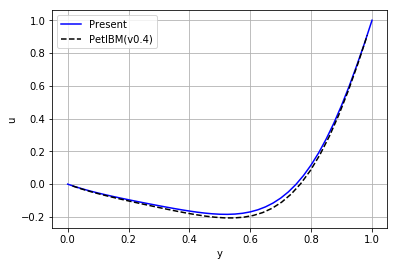

In [23]:
pyplot.figure(figsize = (6.0,4.0))
pyplot.xlabel('y')
pyplot.ylabel('u')
pyplot.plot(y,u_v,'b', label = 'Present')
pyplot.plot(ym,um, 'black', label = 'PetIBM(v0.4)', linestyle = '--')
pyplot.grid()
pyplot.legend()

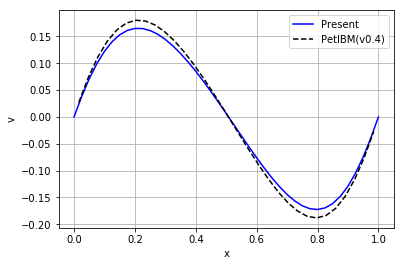

In [24]:
pyplot.figure(figsize = (6.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('v')
pyplot.plot(x,v_v, 'b',label = 'Present')
pyplot.plot(xm,vm, 'black', label = 'PetIBM(v0.4)', linestyle = '--')
pyplot.grid()
pyplot.legend()

---
###### The cell below loads the style of this notebook.

In [25]:
# Execute this cell to load the notebook's style sheet, then ignore it.
from IPython.core.display import HTML
css_file = 'styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())